We can investigate how 2 variables are correlated with each other by using for example Pearson correlation coeffiecient

Pearson correlation coefficient is indicated with (r) and can have values from -1 to 1

+1 Shows that the 2 variables are correlated on a straight positive line , whereas -1 is a straight negative line

0 indicates that the variables are not correlated

In [1]:
# In order to investigate this correlation
import scipy.stats.stats as stats # need to use SciPy library

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style()

Lets declare 2 variables x & y

y = 0.8x+0.36c

In [2]:
np.random.seed(42) # random variables
r = 0.8
x = np.random.normal(size=100)
y = r*x + np.sqrt(1-r**2)*np.random.normal(size=100)
df_1 = pd.DataFrame({'x': x, 'y': y})

In [3]:
df_1

,x,y
0,0.496714,-0.451851
1,-0.138264,-0.362999
2,0.647689,0.312522
3,1.523030,0.737058
4,-0.234153,-0.284094
...,...,...
95,-1.463515,-0.939622
96,0.296120,-0.293418
97,0.261055,0.301079
98,0.005113,0.039016


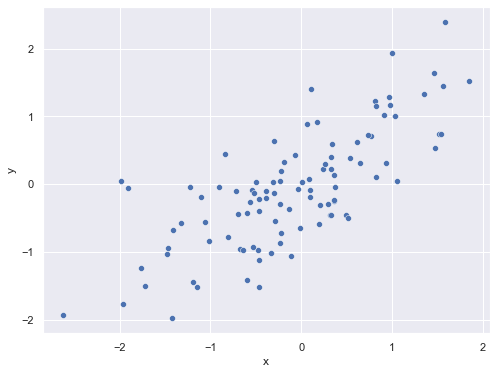

In [4]:
# Create the plot - scatter plot
sns.set(rc={"figure.figsize":(8, 6)})
_ = sns.scatterplot(x='x', y='y', data=df_1)

In [5]:
# In order to calculate Pearson coefficient
stats.pearsonr(df_1.x, df_1.y)

(0.7529004259351295, 1.6598002643730582e-19)

We can see that running this command outputs 2 values
1) p-value - how likely the pearson coeffient will be close to the real value at random
2) pearson coefficient

In [6]:
# y = 0.6x +0.64c
np.random.seed(42)
r = 0.6
x = np.random.normal(size=100)
y = r*x + np.sqrt(1-r**2)*np.random.normal(size=100)
df_2 = pd.DataFrame({'x': x, 'y': y})

In [7]:
df_2

,x,y
0,0.496714,-0.834268
1,-0.138264,-0.419475
2,0.647689,0.114442
3,1.523030,0.271996
4,-0.234153,-0.269521
...,...,...
95,-1.463515,-0.569855
96,0.296120,-0.529414
97,0.261055,0.279613
98,0.005113,0.049635


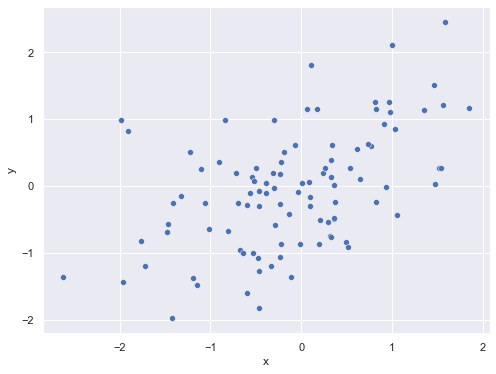

In [8]:
_ = sns.scatterplot(x='x', y='y', data=df_2)

In [10]:
stats.pearsonr(df_2.x, df_2.y)

(0.5038156484709346, 9.120853831670844e-08)

We need to be careful when the data contains outliers

In [11]:
np.random.seed(42)
r = 0.8
x = np.random.normal(size=100)
y = r*x + np.sqrt(1-r**2)*np.random.normal(size=100)
ii = np.argsort(-x) # push some random variables *5 to the left
x[ii[0:5]] *= 5
df_3 = pd.DataFrame({'x': x, 'y': y})

In [12]:
df_3

,x,y
0,0.496714,-0.451851
1,-0.138264,-0.362999
2,0.647689,0.312522
3,7.615149,0.737058
4,-0.234153,-0.284094
...,...,...
95,-1.463515,-0.939622
96,0.296120,-0.293418
97,0.261055,0.301079
98,0.005113,0.039016


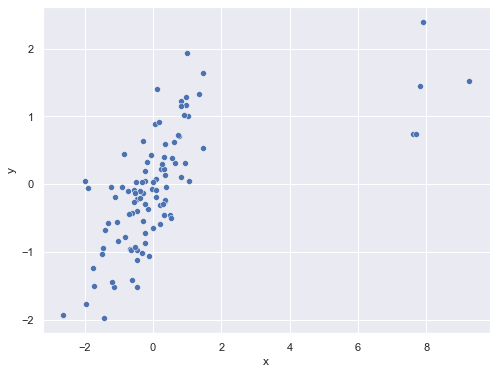

In [13]:
_ = sns.scatterplot(x='x', y='y', data=df_3)

In [14]:
stats.pearsonr(df_3.x, df_3.y)

(0.6200894823297652, 5.996001353052201e-12)

We can see that pearson coefficient drops

Pearson coefficient measure a linear correlation of the data

Can see a photograph from the link below

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#/media/File:Correlation_examples2.svg

Note: 
Even if we get a pearson value of 0 , this does not necessarily mean the data are not correlated. It means that the data are NOT LINEARLY correlated

If the data are not linearly correlated then we can check for the spearman rank correlation

In order to check for (ρ) we need to sort the data in either ascending or descending order

To do that using python we need tp use the function spearman() from the libary scipy.stats.stats

For Example:
https://commons.wikimedia.org/wiki/File:Spearman_fig1.svg

In [15]:
np.random.seed(42)
x = np.random.uniform(size=100)
y = np.log(x/(1-x))
y = np.sign(y)*(np.abs(y)**1.4)
df_4 = pd.DataFrame({'x': x, 'y': y})

In [16]:
df_4

,x,y
0,0.374540,-0.392567
1,0.950714,4.567958
2,0.731994,1.006674
3,0.598658,0.277140
4,0.156019,-2.081504
...,...,...
95,0.493796,-0.005658
96,0.522733,0.034883
97,0.427541,-0.178365
98,0.025419,-6.118256


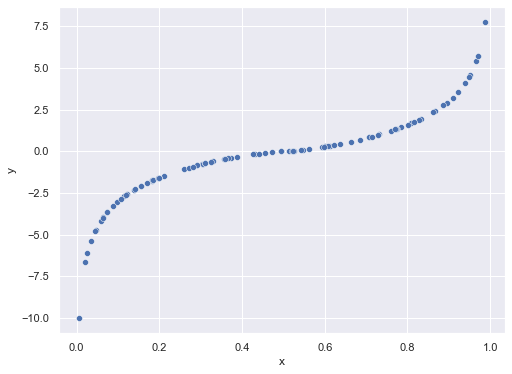

In [ ]:
_ = sns.scatterplot(x='x', y='y', data=df_4)

We can see that the correlation is not linear but there is a correlation

In [18]:
# Calculate pearson and spearman
print('Pearson', stats.pearsonr(df_4.x, df_4.y))
print('Spearman', stats.spearmanr(df_4.x, df_4.y))

Pearson (0.9154291577976972, 1.6129079055536346e-40)
Spearman SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)


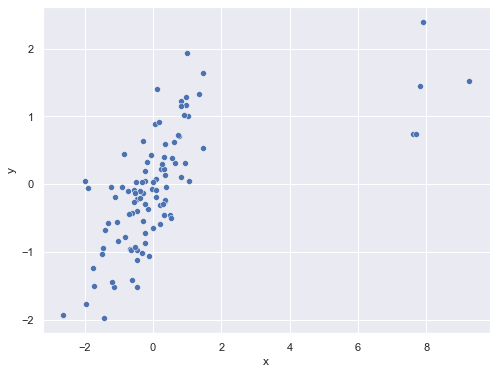

In [19]:
# Spearman coeffiecient is more sensitive to outliers hence for the previous data
_ = sns.scatterplot(x='x', y='y', data=df_3)

In [20]:
print('Pearson', stats.pearsonr(df_3.x, df_3.y))
print(stats.spearmanr(df_3.x, df_3.y))

Pearson (0.6200894823297652, 5.996001353052201e-12)
SpearmanrResult(correlation=0.7201200120012, pvalue=3.0751702980521144e-17)


Lets now see another example

www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html

In [21]:
import pandas as pd

df_ac = pd.read_csv('the_functional_art.csv', header=None, names=['x', 'y'])
df_ac

,x,y
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333
...,...,...
137,39.4872,25.3846
138,91.2821,41.5385
139,50.0000,95.7692
140,47.9487,95.0000


In [22]:
df_ac.describe() # standard statistical calculations

,x,y
count,142.000000,142.000000
mean,54.263273,47.832253
std,16.765142,26.935403
min,22.307700,2.948700
25%,44.102600,25.288450
50%,53.333300,46.025600
75%,64.743600,68.525675
max,98.205100,99.487200


In [23]:
print('Pearson', stats.pearsonr(df_ac.x, df_ac.y))
print(stats.spearmanr(df_ac.x, df_ac.y))

Pearson (-0.06447185270095164, 0.44589659802470616)
SpearmanrResult(correlation=-0.06510904080429955, pvalue=0.44140461256177965)


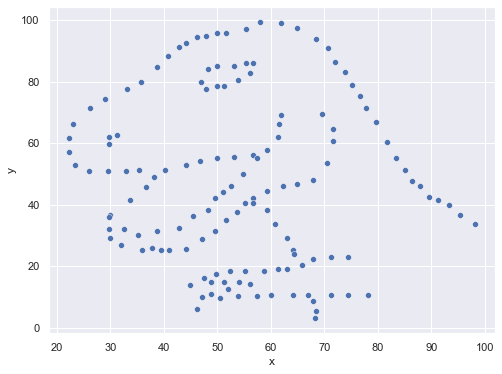

In [ ]:
# Lets now grpah the data
_ = sns.scatterplot(x='x', y='y', data=df_ac)

We can see that the data are not random but they are either linear or in order

Hence either spearman and pearson can identify if there is a correlation

TIP:
We should just stop when we check the correlation coefficient valus but rather since we have the tools we can create graphs in order to verify the correlation